In [22]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [23]:
np.random.seed(42)

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equat to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equat to number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimension is not 28*28"
assert(X_test.shape[1:] == (28,28)), "The dimension is not 28*28"

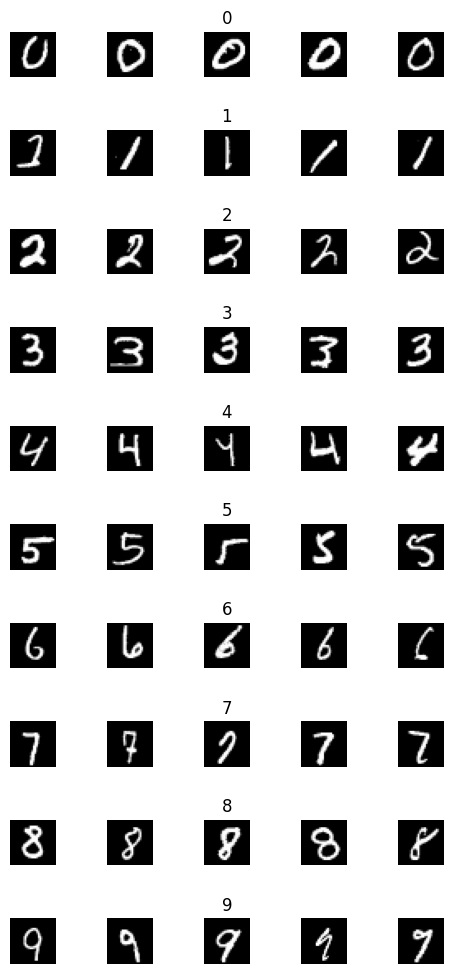

In [26]:
no_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            no_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'No of images')

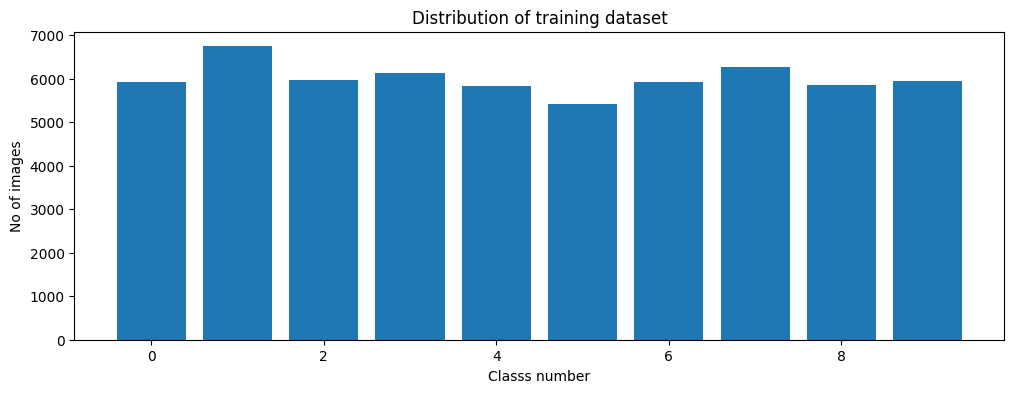

In [27]:
print(no_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), no_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Classs number")
plt.ylabel("No of images")

In [28]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [29]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [42]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout


In [43]:
# Define the LeNet_model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15 , (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [44]:
model = leNet_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             


                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 375)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               188000    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
Total params: 197,855
Trainable params: 197,855
Non-trainable params: 0
____

/home/proxi/anaconda3/envs/udemyDS/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [45]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 1s 8ms/step - loss: 0.5244 - accuracy: 0.8397 - val_loss: 0.1023 - val_accuracy: 0.9735
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.1170 - accuracy: 0.9644 - val_loss: 0.0621 - val_accuracy: 0.9835
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0789 - accuracy: 0.9760 - val_loss: 0.0529 - val_accuracy: 0.9853
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0620 - accuracy: 0.9814 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0515 - accuracy: 0.9847 - val_loss: 0.0427 - val_accuracy: 0.9882
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0374 - val_accuracy: 0.9898
Epoch 7/10
135/135 [==============================] - 1s 8ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0360 - val_accuracy: 0.9912
Epoch 

Text(0.5, 0, 'epochs')

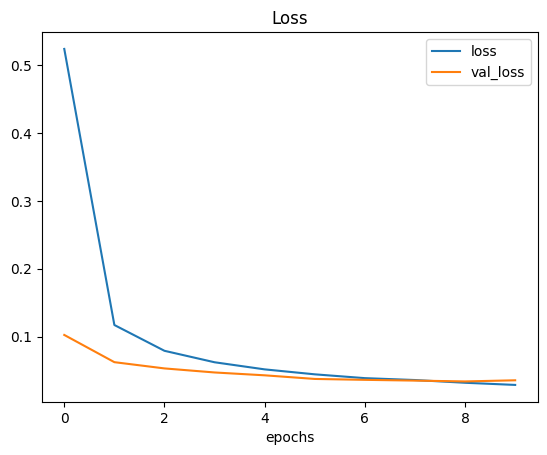

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

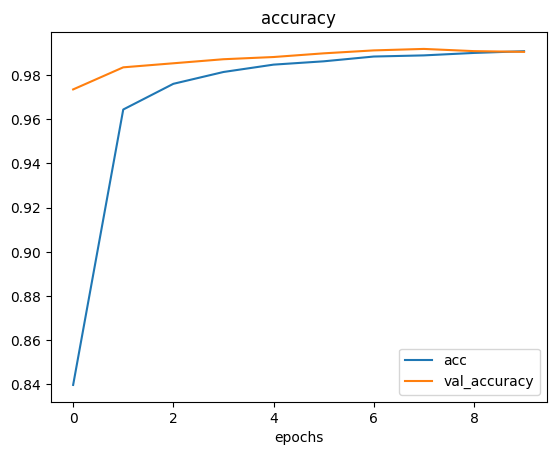

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

<Response [200]>


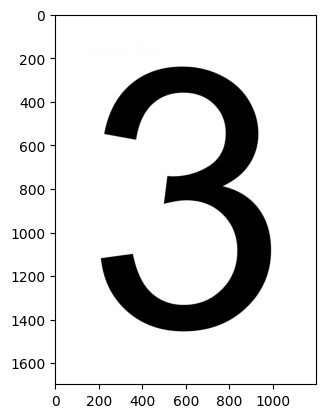

In [48]:
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

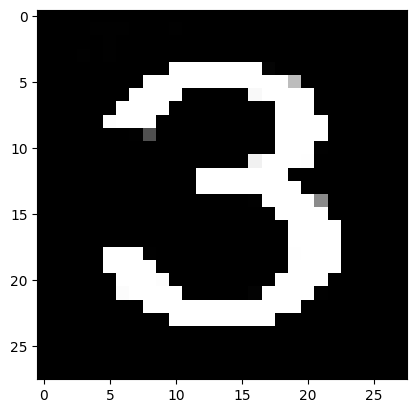

In [50]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [51]:
image = image / 255
image = image.reshape(1, 28 , 28, 1)


In [52]:
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)
print("predicted digits:", str(predicted_class))

1/1 [==============================] - 0s 63ms/step
predicted digits: [3]


In [53]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.02713579498231411
Test accuracy: 0.9908999800682068
